<a href="https://colab.research.google.com/github/ChakritKammason/DPDM/blob/master/Final_Exam_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. จากข้อมูล (```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv```) ใน http://qr.tebs.io/TTGDFf สร้าง model เพื่อทำนาย (Classification) ว่าผลการ search เป็นร้านอาหารหรือไม่(```is_food = = True```) โดยพิจารณาจาก 
- วันในสัปดาห์ที่ทำการ search (```Monday-Sunday```) 
- วันในที่ทำการ search (```1-31```)
- เวลาที่ทำการ search (```1-24```)

หมายเหตุที่ 1 สามารถใช้ function ที่ให้มาช่วยในการทำงานได้
1. ```extract_time()``` ซึ่ง input เป็น ```timestamp``` และ output เป็น ```เวลาที่ทำการ search```, ```วันที่ทำการ search```, ```วันในสัปดาห์ที่ทำการ search```

2. ```is_food()``` ซึ่ง input เป็น ```category_name``` และ ```output``` เป็น คำตอบว่า ```เป็นร้านอาหารหรือไม่```

หมายเหตุที่ 2 ควรเตรียมข้อมูลโดยรวมข้อมูลจาก ตาราง ```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv``` ให้ได้ในรูปแบบ ต่อไปนี้
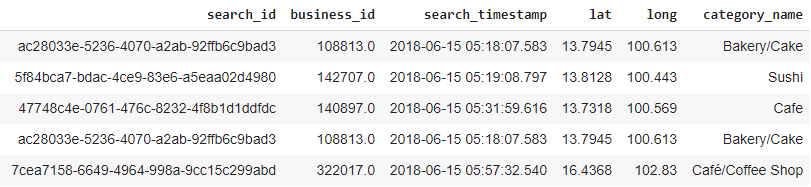

(150 คะแนน)

In [52]:
import datetime
def extract_time(datetime_s):
    EX_date = datetime.datetime.strptime(datetime_s, "%Y-%m-%d %H:%M:%S.%f")
    return EX_date.hour, EX_date.day, get_day(EX_date.weekday()) 

def get_day(D):
    weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    return weekdays[D] 

def is_food(inp):
    food_list = ['Vegeterian','Sushi','Sukiyaki/Shabu','Street Food/Food Stands','Steak House/Barbeque','Southern Food','Seafood','Ramen','Quick Meal','Pizza','Northern Food','Noodles','Mexican','Korean',
             'Japanese','Italian','Izakaya','Healthy Food','German Food','Fusion Food','French','Food Truck','Fastfood','Dim Sum','Delivery Only','Chinese','Cafe','Café/Coffee Shop','Buffet',
             'Breakfast/Brunch','Bakery/Cake','Barbeque/Grill','American']
    return inp in food_list

2. จากข้อมูล (```reduced_marketbasket.csv```) ใน http://qr.tebs.io/TTGDFf ให้เปรียบเทียบ รูปแบบ การซื้อที่น่าสนใจเป็นราย Transaction ของประชากรใน ประเทศ ```United Kingdom``` กับ ประเทศอื่นๆ (```'Country'!='United Kingdom'```)

(40 คะแนน)

3. เขียนคำศัพท์ที่ได้เรียนในวิชาพร้อมทั้งคำนิยามที่เป็นคำพูดของนักศึกษาเอง (ห้าม search google) 20 คำ

(คำละ 0.5 คะแนน)

# ข้อ 1 

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os
base_path = '/content/drive/My Drive/DWDM_Material'
os.listdir(base_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['teach.csv',
 '03 สังคม.xls',
 '52835793_259306464964511_3851804852342489088_n.png',
 'Copy of search_click.csv',
 'Copy of w_restaurant.csv',
 'Preprocessing02.html',
 'reduced_marketbasket.csv',
 'search_click.csv',
 'teach02.csv',
 'test.csv',
 'w_restaurant.csv',
 'AnimalsPlague.csv',
 '666d790734bee7737c0b5144c462b9b5.jpg',
 'AnimalPlague.csv',
 'AnimalsCorn.csv',
 'Local.xlsx',
 'Local.csv',
 'AnimalCorn.csv',
 'AnimalCorn.xlsx',
 'metadata.xlsx',
 'search_request.csv']

In [2]:
search_click = os.path.join(base_path,'search_click.csv')
w_restaurant = os.path.join(base_path,'w_restaurant.csv')
search_request = os.path.join(base_path, 'search_request.csv')

In [3]:
search_click_df = pd.read_csv(search_click)
w_restaurant_df = pd.read_csv(w_restaurant)
search_request_df = pd.read_csv(search_request)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
table = search_click_df.merge(w_restaurant_df,how='left',left_on='business_id',right_on='id') # รวมตาราง search_click_df และ w_restaurant_df โดยใช้ business_id และ id เป็นตัวเชื่อม

In [5]:
table1 = pd.merge(table,search_request_df,on='search_id') # รวมตาราง table 1 และ search_request_df ด้วย search_id

In [6]:
table2 = table1[['search_id', 'business_id', 'search_timestamp', 'lat','long','category_name']] # เลือก column ที่ต้องการ

In [7]:
search_click_df = []
w_restaurant_df = []
search_request_df = []
table = []
table1 = []

In [8]:
table2

,search_id,business_id,search_timestamp,lat,long,category_name
0,ac28033e-5236-4070-a2ab-92ffb6c9bad3,108813.0,2018-06-15 05:18:07.583,13.7945,100.613,Bakery/Cake
1,ac28033e-5236-4070-a2ab-92ffb6c9bad3,108813.0,2018-06-15 05:18:07.583,13.7945,100.613,Bakery/Cake
2,ac28033e-5236-4070-a2ab-92ffb6c9bad3,232676.0,2018-06-15 05:18:07.583,13.7945,100.613,Quick Meal
3,5f84bca7-bdac-4ce9-83e6-a5eaa02d4980,142707.0,2018-06-15 05:19:08.797,13.8128,100.443,Sushi
4,47748c4e-0761-476c-8232-4f8b1d1ddfdc,140897.0,2018-06-15 05:31:59.616,13.7318,100.569,Cafe
...,...,...,...,...,...,...
4428445,9c0e3c40-56a2-4d5d-b54e-c4d88f89f008,250231.0,2018-06-28 06:41:16.944,12.573,99.9558,Cafe
4428446,9ecd2dc1-b6f6-486d-b751-33eb16c53951,16614.0,2018-06-28 01:59:06.275,13.758,100.56,Healthy Food
4428447,9ecd2dc1-b6f6-486d-b751-33eb16c53951,16614.0,2018-06-28 01:59:06.275,13.758,100.56,Healthy Food
4428448,d086453d-7fde-4766-af39-8205f0f0a4aa,19569.0,2018-06-28 06:48:45.175,12.9324,100.885,Cafe


กำจัดค่า Missing

In [12]:
table2.isnull() #เช็คค่าในตารางว่ามี Outlier ไหม

,search_id,business_id,search_timestamp,lat,long,category_name
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4428445,False,False,False,False,False,False
4428446,False,False,False,False,False,False
4428447,False,False,False,False,False,False
4428448,False,False,False,False,False,False


In [13]:
table2.isnull().any() #เช็คค่าในตารางว่ามี missing ไหม

search_id           False
business_id          True
search_timestamp    False
lat                  True
long                 True
category_name        True
dtype: bool

In [14]:
table3 = table2.dropna() # กำจัดค่า missing โดยการลบแถวที่มีค่า missing ออกไป
table3.isnull().any() #เช็คค่าในตารางว่ามี missing ไหม -ขึ้นว่า False แสดงว่าไม่มีค่า missing

search_id           False
business_id         False
search_timestamp    False
lat                 False
long                False
category_name       False
dtype: bool

In [15]:
groups = table3.groupby('business_id').count().sort_values('category_name')
groups.head()

,search_id,search_timestamp,lat,long,category_name
business_id,,,,,
106099.0,1,1,1,1,1
250117.0,1,1,1,1,1
38224.0,1,1,1,1,1
38223.0,1,1,1,1,1
38222.0,1,1,1,1,1


In [16]:
groups['category_name']  = groups['search_id'].map(table3['category_name'])
groups

,search_id,search_timestamp,lat,long,category_name
business_id,,,,,
106099.0,1,1,1,1,Bakery/Cake
250117.0,1,1,1,1,Bakery/Cake
38224.0,1,1,1,1,Bakery/Cake
38223.0,1,1,1,1,Bakery/Cake
38222.0,1,1,1,1,Bakery/Cake
...,...,...,...,...,...
56215.0,1740,1740,1740,1740,North East
250135.0,1808,1808,1808,1808,NaN
331572.0,2190,2190,2190,2190,Seafood


จากตาราง อาหารที่ถูกค้นมากที่สุดคือ  North East รองลงมาเป็นอันดับ 2 คือ ไม่ทราบชื่อ

In [17]:
import datetime
def extract_time(datetime_s):
    EX_date = datetime.datetime.strptime(datetime_s, "%Y-%m-%d %H:%M:%S.%f")
    return EX_date.hour, EX_date.day, get_day(EX_date.weekday()) 

def get_day(D):
    weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    return weekdays[D] 

def is_food(inp):
    food_list = ['Vegeterian','Sushi','Sukiyaki/Shabu','Street Food/Food Stands','Steak House/Barbeque','Southern Food','Seafood','Ramen','Quick Meal','Pizza','Northern Food','Noodles','Mexican','Korean',
             'Japanese','Italian','Izakaya','Healthy Food','German Food','Fusion Food','French','Food Truck','Fastfood','Dim Sum','Delivery Only','Chinese','Cafe','Café/Coffee Shop','Buffet',
             'Breakfast/Brunch','Bakery/Cake','Barbeque/Grill','American']
    return inp in food_list

In [38]:
extract_time('2018-06-15 05:18:07.583')

(5, 15, 'Friday')

In [39]:
is_food('Bakery/Cake')

True

Classification

แบ่งข้อมูล ออกเป็น 2 ส่วน train และ test ใช้ train เพื่อเลือกโมเดลที่ทำงานได้แม่นยำที่สุดกับ Test Set

In [69]:
X = table3[['business_id','lat','long']] # แบ่งกลุ่มของ X โดยเลือกแบ่งตาม business_id,lat,long
X.shape

(2549987, 3)

In [57]:
y = table3[['category_name']] # แบ่งกลุ่มของ Y โดยเลือกแบ่งตาม category_name
y

,category_name
0,Bakery/Cake
1,Bakery/Cake
2,Quick Meal
3,Sushi
4,Cafe
...,...
4428445,Cafe
4428446,Healthy Food
4428447,Healthy Food
4428448,Cafe


In [58]:
X_train = X.iloc[:-509997 ,:] #-509997 คือ เทรน 20% จากทั้งหมด
print(X_train.shape)

(2039990, 3)


In [59]:
X_test = X.iloc[-509997 :,:] #-509997 คือ เทส 80% จากทั้งหมด
print(X_train.shape)
X_test

(2039990, 3)


,business_id,lat,long
3687322,257259.0,13.5833,100.427
3687323,68668.0,13.7552,100.476
3687324,68668.0,13.7552,100.476
3687326,290545.0,7.01948,100.487
3687329,322314.0,18.581,99.0624
...,...,...,...
4428445,250231.0,12.573,99.9558
4428446,16614.0,13.758,100.56
4428447,16614.0,13.758,100.56
4428448,19569.0,12.9324,100.885


In [60]:
y_train = y.iloc[:-509997 ,:] #-509997 คือ 20% จากทั้งหมด
print(y_train.shape)

(2039990, 1)


In [61]:
y_test = y.iloc[-509997 :,:] #-509997 คือ เทส 80% จากทั้งหมด
y_test

,category_name
3687322,Seafood
3687323,Noodles
3687324,Noodles
3687326,Japanese
3687329,Sukiyaki/Shabu
...,...
4428445,Cafe
4428446,Healthy Food
4428447,Healthy Food
4428448,Cafe


KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier #จัดแบ่งคลาส โดยเทคนิคนี้จะตัดสินใจว่า คลาสใดที่จะแทนเงื่อนไขหรือกรณีใหม่ๆ ได้บ้าง โดยการตรวจสอบจำนวนบางจำนวน (“K” ในขั้นตอนวิธีการเพื่อนบ้านใกล้ที่สุด)

In [63]:
myKNN = KNeighborsClassifier(n_neighbors=20) #มองหาจำนวนเพื่อนบ้าน = 20

In [64]:
myKNN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [65]:
myKNN.predict(X_test)

array(['Seafood', 'Noodles', 'Noodles', ..., 'Healthy Food', 'Cafe',
       'Thai'], dtype=object)

In [66]:
myKNN = KNeighborsClassifier(n_neighbors=30) #มองหาจำนวนเพื่อนบ้าน = 30

In [67]:
myKNN.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [68]:
myKNN.predict(X_test)

array(['Seafood', 'Noodles', 'Noodles', ..., 'Healthy Food', 'Cafe',
       'Thai'], dtype=object)

In [55]:
 from sklearn.model_selection import train_test_split # เลือกโมเดลที่ดีที่สุด

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #test_size ขนาดของจำนวน test

In [71]:
print(f'{X_train.shape} {X_test.shape}')

(1784990, 3) (764997, 3)


In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
#1. Define model 
KNN_k3_wU = KNeighborsClassifier(n_neighbors=20)
#2. cros validation
cross_val_score(KNN_k3_wU, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

0.7969831763763382

Train model ที่ดีที่สุดด้วย training set แล้ววัดผลด้วย test set

In [74]:
#1. Define model 
KNN_k3_wU = KNeighborsClassifier(n_neighbors=20)
#2. train
KNN_k3_wU.fit(X_train,y_train)
#3. test_Evaluation
KNN_k3_wU.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.8336895438805643

จาก data  โมเดลที่แม่นยำที่สุดคือ knn test โมเดลที่มีความแม่นยำที่สุด โดยมีพารามิเตอร์ K = 20 มีความแม่นยำ = 83.37%

#ข้อ 2

In [18]:
reduced_marketbasket_df = pd.read_csv(os.path.join(base_path,'reduced_marketbasket.csv'),encoding = 'unicode_escape')
reduced_marketbasket_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [103]:
Uk_table = reduced_marketbasket_df[reduced_marketbasket_df['Country'] == 'United Kingdom']
Uk_table.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [121]:
transacs = Uk_table.groupby('CustomerID')['Description'].apply(list)
transacs

CustomerID
12346.0    [MEDIUM CERAMIC TOP STORAGE JAR, MEDIUM CERAMI...
12747.0    [GREEN JUICY FRUIT PHOTO FRAME, BLUE JUICY FRU...
12748.0    [CREAM SWEETHEART EGG HOLDER, GREEN CHRISTMAS ...
12749.0    [FAMILY PHOTO FRAME CORNICE, PHOTO FRAME CORNI...
12820.0    [PACK OF 60 PINK PAISLEY CAKE CASES, 72 SWEETH...
                                 ...                        
18280.0    [WOOD BLACK BOARD ANT WHITE FINISH, RETROSPOT ...
18281.0    [ROBOT BIRTHDAY CARD, CARD CIRCUS PARADE, PENN...
18282.0    [ANTIQUE CREAM CUTLERY CUPBOARD, FRENCH STYLE ...
18283.0    [CHARLOTTE BAG PINK POLKADOT, LUNCH BAG WOODLA...
18287.0    [SMALL PURPLE BABUSHKA NOTEBOOK , SMALL RED BA...
Name: Description, Length: 3950, dtype: object

In [116]:
!pip install apyori

In [117]:
from apyori import apriori

In [129]:
out = list(apriori(transacs, min_support = 0.15, min_confidence = 0.1))
out

[RelationRecord(items=frozenset({'ASSORTED COLOUR BIRD ORNAMENT'}), support=0.16278481012658227, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'ASSORTED COLOUR BIRD ORNAMENT'}), confidence=0.16278481012658227, lift=1.0)]),
 RelationRecord(items=frozenset({"PAPER CHAIN KIT 50'S CHRISTMAS "}), support=0.1508860759493671, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"PAPER CHAIN KIT 50'S CHRISTMAS "}), confidence=0.1508860759493671, lift=1.0)]),
 RelationRecord(items=frozenset({'PARTY BUNTING'}), support=0.16683544303797468, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'PARTY BUNTING'}), confidence=0.16683544303797468, lift=1.0)]),
 RelationRecord(items=frozenset({'REGENCY CAKESTAND 3 TIER'}), support=0.19569620253164557, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'REGENCY CAKESTAND 3 TIER'}), confidence=0.19569620253164557, lift=1.0)]),
 Rel

คนที่จะซื้อสินค้า {'ASSORTED COLOUR BIRD ORNAMENT'} มีความน่าจะเป็นคือ 0.16278481012658227

คนที่จะซื้อสินค้า {'PAPER CHAIN KIT 50'S CHRISTMAS'} มีความน่าจะเป็นคือ 0.1508860759493671 

คนที่จะซื้อสินค้า {'PARTY BUNTING'} มีความน่าจะเป็นคือ 0.16683544303797468 

คนที่จะซื้อสินค้า {'REGENCY CAKESTAND 3 TIER'} มีความน่าจะเป็นคือ 0.19569620253164557 

คนที่จะซื้อสินค้า {'WHITE HANGING HEART T-LIGHT HOLDER'} มีความน่าจะเป็นคือ =0.20835443037974682 

และ lift > 1 ทุกคู่ ดังนั้นจะมีโปรโมชั่นให้ ถ้าลูกค้าซื้อสินค้า ดังกล่าวจะได้รับโปรโมชั่น ซื้อ 1 แถม 1

#ข้อ 3

- Data is a new oil เปรียบได้ว่า ใครมีน้ำมันเยอะก้รวย เหมือนข้อมูล ใครมีข้อมูลเอะก้รวย
- Internet of Things (IOT) คือ "อินเตอร์เน็ตในทุกสิ่ง"
- Data mining คือ การทำเหมืองข้อมูล ทำเพื่อให้ได้ความรู้ออกมาดูจากแพทเทิร์นที่เกิดซ้ำในองค์ข้อมูล เช่นข้อมูลการวิเคราะห์การซื้อของในตระกร้า ของซุปเปอร์มาร์เก็ต
- Query คือ การค้นคืนข้อมูล
- Data integration คือ การรวมข้อมูลโดยการเอา Data จากหลายๆ แหล่งมารวมกัน เช่น การใช้เลขบัตรประชาชนในการเชื่อมข้อมูลเข้าหากัน (จัดให้ข้อมูลเป็น ฟอร์แมทเดียวกัน)
- Data Warehouse คือ ที่ๆเก็บข้อมูลที่เอาไว้ตอบโจทย์ทางธุรกิจโจทย์นึง และโชว์ข้อมูลในมุมมองต่างๆ
DBA คือ คนที่อยู่ใกล้ชิดกับ DATA มากที่สุด (คนที่สร้างฐานข้อมูล)
- Classification คือ ทำนายโดยที่เรารู้ผลในข้อมูลที่เรามีอยู่แล้ว
- Clustering คือ เราจะจัดกลุ่มที่มีลักษณะเหมือนกันให้อยู่ด้วยกันโดยที่ไม่รู้ว่าชื่อกลุ่มคืออะไร
- Pos Processing - Patern Evaluation การประมาลผลว่าแพทเทิร์นที่เราได้ออกมามีความน่าเชื่อถือมากน้อยแค่ไหน
- Patern Selection หลักการในการเลือกแพทเทิร์น
- Patern Interpre ... การแปรผลของแพทเทิร์นนั้น
- Data Streams คือ ข้อมูลที่มาเรื่อยๆ เก็บเรื่อยๆ เช่น sensor
- Times series Data คือ Data ที่มีเวลาเข้ามาเกี่ยวข้อง เช่น หุ้น
- Structure Data Data ในรูปแบบ กราฟ เช่น การมีเพื่อนใน Facebook
- Spacial Data คือ Data เชิงพื้นที่ เช่น แผนที่ รูปภาพ \\ Speciotemporal Data คือ Data ที่เกี่ยวกับทั้งเชิงพื้นที่ และ เวลา เช่น วิดีโอ
- Multimedia Data คือ ข้อมูลของ วิดีโอยูทูป ไลฟ์ ต่างๆ
- Text Data คือ เป็นข้อมูลที่เป็นข้อความ เช่น คำว่าสถิติ มีคำอธิบายอะไรบ้าง
- Data Cube การมองข้อมูลที่มองในมุมมองต่างๆได้
- Attribute คือ ส่วนที่ อธิบายถึง Data
- Attribute type คือ ลักษณะของ แต่ละ Attribute
ตารางใน Data Base มีลักษณะเด่นคือแต่ละตารางจะมีความเชื่อมโยงกัน โดยเวลาจะเชื่อมข้อมูลในแต่ละตารางจะใช้ ID ในการเชื่อม
- Key/index ใช้ในการ ชี้/เชื่อม ข้อมูล
- cross tab คือ Attribute 2 อันมารวมกัน
- Transaction data คือ ตารางที่ไม่มี Attribute
- structure data คือ data ที่มีโครงสร้าง หาค่าต่างๆได้
- Data object คือ ตัว Data แต่ละตัวใน Data set อาจเรียกว่า record , data point, tuples โดยจะถูกอธิบายด้วย Attribute
- Attribute หรือจะเรียกว่า Dimensions , Feature ก้ได้ เป็น Data ในคอลลัมน์ในแนวแกนตั้งที่อธิบายข้อมูลในแต่ละอัน โดยจะมีหลายประเภท เช่น Nominal(แทนข้อมูลด้วยชื่อ) // Binary ข้อมูลที่แทนด้วยสองลักษณะ // Ordinal ข้อมูลที่เรียงลำดับได้ // Numeric ข้อมูลที่เป็นตัวลข โดยข้อมูล numeric สามารถแบ่งออกได้ เช่น interval (ข้อมูลแบบช่วง) ratio (ข้อมูลแบบอัตราส่วน)
- Symmetric binary คือข้อมูลที่ไม่สมมาตร Asymmetric binary คือข้อมูลที่ไม่สมมาตร
- Discrete Attribute คือ ข้อมูลที่มีความไม่ต่อเนื่อง เป็นจำนวนเต็มไม่อย่างเดียว
- Countinous Attribute คือ ข้อมูลที่มีความต่อเนื่อง เช่น เลขทศนิยม